<a href="https://colab.research.google.com/github/Naaaaaana/DWBI_Groupcw2/blob/main/DWBIGCW_rfm_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import xlrd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3

In [ ]:
df = pd.read_csv('/content/bank_transactions.csv')

In [ ]:
df.shape

(1048567, 9)

In [ ]:
df.isnull().sum()

,0
TransactionID,0
CustomerID,0
CustomerDOB,3397
CustGender,1100
CustLocation,151
CustAccountBalance,2369
TransactionDate,0
TransactionTime,0
TransactionAmount (INR),0


In [ ]:
df.isna().sum()/len(df)*100

,0
TransactionID,0.000000
CustomerID,0.000000
CustomerDOB,0.323966
CustGender,0.104905
CustLocation,0.014401
CustAccountBalance,0.225927
TransactionDate,0.000000
TransactionTime,0.000000
TransactionAmount (INR),0.000000


In [ ]:
df_Fact1 = df

In [ ]:
df_Fact1 = df_Fact1.dropna()

In [ ]:
df_Fact1.isna().sum()

,0
TransactionID,0
CustomerID,0
CustomerDOB,0
CustGender,0
CustLocation,0
CustAccountBalance,0
TransactionDate,0
TransactionTime,0
TransactionAmount (INR),0


In [ ]:
#The deleted data is less than 0.7% of the total data size.
df_Fact1.shape

(1041614, 9)

In [ ]:
# Count unique DOBs per customer
dob_check = df_Fact1.groupby("CustomerID")["CustomerDOB"].nunique()

# Find customers that still have more than 1 unique DOB
conflicts = dob_check[dob_check > 1]

print("Customers with multiple DOBs remaining (should be 0):")
print(conflicts)

Customers with multiple DOBs remaining (should be 0):
CustomerID
C1010011    2
C1010014    2
C1010031    2
C1010035    2
C1010041    3
           ..
C9090141    2
C9093042    2
C9094224    2
C9095886    2
C9096252    2
Name: CustomerDOB, Length: 140647, dtype: int64


In [ ]:
# Replace DateOfBirth with mode for each CustomerID
df_Fact1['CustomerDOB'] = df_Fact1.groupby('CustomerID')['CustomerDOB'].transform(lambda x: x.mode().iloc[0])

<ipython-input-11-3def4da8cb93>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Fact1['CustomerDOB'] = df_Fact1.groupby('CustomerID')['CustomerDOB'].transform(lambda x: x.mode().iloc[0])


In [ ]:
# Count unique DOBs per customer
dob_check = df_Fact1.groupby("CustomerID")["CustomerDOB"].nunique()

# Find customers that still have more than 1 unique DOB
conflicts = dob_check[dob_check > 1]

print("Customers with multiple DOBs remaining (should be 0):")
print(conflicts)

Customers with multiple DOBs remaining (should be 0):
Series([], Name: CustomerDOB, dtype: int64)


In [ ]:
# Count unique DOBs per customer
gender_check = df_Fact1.groupby("CustomerID")["CustGender"].nunique()

# Find customers that still have more than 1 unique DOB
conflicts = gender_check[gender_check > 1]

print("Customers with multiple genders (should be 0):")
print(conflicts)

Customers with multiple genders (should be 0):
CustomerID
C1010011    2
C1010014    2
C1010046    2
C1010081    2
C1010089    2
           ..
C9071415    2
C9073541    2
C9079190    2
C9094224    2
C9095886    2
Name: CustGender, Length: 59341, dtype: int64


In [ ]:
# Replace gender with mode for each CustomerID
df_Fact1['CustGender'] = df_Fact1.groupby('CustomerID')['CustGender'].transform(lambda x: x.mode().iloc[0])

<ipython-input-14-e1d194e626f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Fact1['CustGender'] = df_Fact1.groupby('CustomerID')['CustGender'].transform(lambda x: x.mode().iloc[0])


In [ ]:
# Count unique DOBs per customer
gender_check = df_Fact1.groupby("CustomerID")["CustGender"].nunique()

# Find customers that still have more than 1 unique DOB
conflicts = gender_check[gender_check > 1]

print("Customers with multiple genders remaining (should be 0):")
print(conflicts)

Customers with multiple genders remaining (should be 0):
Series([], Name: CustGender, dtype: int64)


In [ ]:
from datetime import datetime

In [ ]:
df_Fact1['CustomerDOB'] = pd.to_datetime(df_Fact1['CustomerDOB'], dayfirst=True, errors='coerce')

current_year = 2025
df_Fact1['Age'] = current_year - df_Fact1['CustomerDOB'].dt.year

<ipython-input-17-3968a2158185>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_Fact1['CustomerDOB'] = pd.to_datetime(df_Fact1['CustomerDOB'], dayfirst=True, errors='coerce')
<ipython-input-17-3968a2158185>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Fact1['CustomerDOB'] = pd.to_datetime(df_Fact1['CustomerDOB'], dayfirst=True, errors='coerce')
<ipython-input-17-3968a2158185>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [ ]:
df_Fact1.head(10)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.00,31
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2/8/16,141858,27999.00,-32
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2/8/16,142712,459.00,29
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2/8/16,142714,2060.00,-48
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.50,37
5,T6,C1536588,2072-10-08,F,ITANAGAR,53609.20,2/8/16,173940,676.00,-47
6,T7,C7126560,1986-09-14,M,MUMBAI,973.46,2/8/16,173806,566.00,39
7,T8,C1220223,1982-01-27,M,MUMBAI,95075.54,2/8/16,170537,148.00,43
8,T9,C8536061,1988-04-19,F,GURGAON,14906.96,2/8/16,192825,833.00,37
9,T10,C6638934,1984-06-22,M,MUMBAI,4279.22,2/8/16,192446,289.11,41


In [ ]:
#filter Transectiondate error
future_transactions = df_Fact1[df_Fact1['TransactionDate'] >= '2025-04-01']
pre_birth_transactions = df_Fact1[df_Fact1['TransactionDate'] <= df_Fact1['CustomerDOB']]
print("the transactiondate after 2025：", future_transactions.shape[0])
print("the transactiondate before birth：", pre_birth_transactions.shape[0])

the transactiondate after 2025： 567577
the transactiondate before birth： 104113


In [ ]:
# Ensure datetime format
df_Fact1["CustomerDOB"] = pd.to_datetime(df_Fact1["CustomerDOB"], errors='coerce')
df_Fact1["TransactionDate"] = pd.to_datetime(df_Fact1["TransactionDate"], errors='coerce')

# Calculate age at time of transaction
df_Fact1["AgeAtTransaction"] = ((df_Fact1["TransactionDate"] - df_Fact1["CustomerDOB"]).dt.days // 365)

# Find rows with age < 10
age_issues = df_Fact1[df_Fact1["AgeAtTransaction"] < 10]

# Count how many have age > 0
valid_age_count = df_Fact1[df_Fact1["AgeAtTransaction"] > 0].shape[0]

print(f"Customers under 10 years old: {age_issues.shape[0]}")
print(f"Customers with age > 0: {valid_age_count}")

Customers under 10 years old: 104287
Customers with age > 0: 937493


<ipython-input-20-effcaf656fc4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Fact1["CustomerDOB"] = pd.to_datetime(df_Fact1["CustomerDOB"], errors='coerce')
<ipython-input-20-effcaf656fc4>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_Fact1["TransactionDate"] = pd.to_datetime(df_Fact1["TransactionDate"], errors='coerce')
<ipython-input-20-effcaf656fc4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [ ]:
df_Fact1.shape

(1041614, 11)

In [ ]:
# Ensure datetime format
df_Fact1["CustomerDOB"] = pd.to_datetime(df_Fact1["CustomerDOB"], errors='coerce')
df_Fact1["TransactionDate"] = pd.to_datetime(df_Fact1["TransactionDate"], errors='coerce')

# Calculate age at time of transaction
df_Fact1["AgeAtTransaction"] = ((df_Fact1["TransactionDate"] - df_Fact1["CustomerDOB"]).dt.days // 365)

# Find rows with age < 10
age_issues = df_Fact1[df_Fact1["AgeAtTransaction"] < 10]

# Count how many have age > 0
valid_age_count = df_Fact1[df_Fact1["AgeAtTransaction"] > 0].shape[0]

# Count customers with age < 0
negative_age_count = df_Fact1[df_Fact1["AgeAtTransaction"] < 0].shape[0]

print(f"Customers with negative age: {negative_age_count}")
print(f"Customers under 10 years old: {age_issues.shape[0]}")
print(f"Customers with age > 0: {valid_age_count}")

<ipython-input-22-897530f0bad1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Fact1["CustomerDOB"] = pd.to_datetime(df_Fact1["CustomerDOB"], errors='coerce')


Customers with negative age: 104113
Customers under 10 years old: 104287
Customers with age > 0: 937493


<ipython-input-22-897530f0bad1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Fact1["TransactionDate"] = pd.to_datetime(df_Fact1["TransactionDate"], errors='coerce')
<ipython-input-22-897530f0bad1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Fact1["AgeAtTransaction"] = ((df_Fact1["TransactionDate"] - df_Fact1["CustomerDOB"]).dt.days // 365)


In [ ]:
from datetime import timedelta

# Ensure datetime format
df_Fact1["CustomerDOB"] = pd.to_datetime(df_Fact1["CustomerDOB"], errors="coerce")
df_Fact1["TransactionDate"] = pd.to_datetime(df_Fact1["TransactionDate"], errors="coerce")

# Recalculate age
df_Fact1["AgeAtTransaction"] = ((df_Fact1["TransactionDate"] - df_Fact1["CustomerDOB"]).dt.days // 365)

# Adjust DOBs with negative age by subtracting 100 years
mask = df_Fact1["AgeAtTransaction"] < 0
df_Fact1.loc[mask, "CustomerDOB"] = df_Fact1.loc[mask, "CustomerDOB"] - pd.DateOffset(years=100)

# Recalculate age after correction (optional)
df_Fact1["AgeAtTransaction"] = ((df_Fact1["TransactionDate"] - df_Fact1["CustomerDOB"]).dt.days // 365)

<ipython-input-23-f7d414d8c6eb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Fact1["CustomerDOB"] = pd.to_datetime(df_Fact1["CustomerDOB"], errors="coerce")
<ipython-input-23-f7d414d8c6eb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Fact1["TransactionDate"] = pd.to_datetime(df_Fact1["TransactionDate"], errors="coerce")
<ipython-input-23-f7d414d8c6eb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [ ]:
initial_count = len(df_Fact1)
df_Fact1 = df_Fact1[df_Fact1["AgeAtTransaction"] >= 10]
removed = initial_count - len(df_Fact1)

print(f"Removed {removed} rows with age under 10.")

Removed 174 rows with age under 10.


In [ ]:
# Ensure datetime format
df_Fact1["CustomerDOB"] = pd.to_datetime(df_Fact1["CustomerDOB"], errors='coerce')
df_Fact1["TransactionDate"] = pd.to_datetime(df_Fact1["TransactionDate"], errors='coerce')

# Calculate age at time of transaction
df_Fact1["AgeAtTransaction"] = ((df_Fact1["TransactionDate"] - df_Fact1["CustomerDOB"]).dt.days // 365)

# Find rows with age < 10
age_issues = df_Fact1[df_Fact1["AgeAtTransaction"] < 10]

# Count how many have age > 0
valid_age_count = df_Fact1[df_Fact1["AgeAtTransaction"] >= 10].shape[0]

# Count customers with age < 0
negative_age_count = df_Fact1[df_Fact1["AgeAtTransaction"] < 0].shape[0]

print(f"Customers with negative age: {negative_age_count}")
print(f"Customers under 10 years old: {age_issues.shape[0]}")
print(f"Customers with age >= 10: {valid_age_count}")

Customers with negative age: 0
Customers under 10 years old: 0
Customers with age >= 10: 1041440


In [ ]:
from datetime import datetime

# Drop the old column
df_Fact1.drop(columns=["AgeAtTransaction"], inplace=True)

# Calculate age as of today
today = pd.to_datetime(datetime.today().date())
df_Fact1["Age"] = ((today - df_Fact1["CustomerDOB"]).dt.days // 365)

In [ ]:
df_Fact1.dtypes

,0
TransactionID,object
CustomerID,object
CustomerDOB,datetime64[ns]
CustGender,object
CustLocation,object
CustAccountBalance,float64
TransactionDate,datetime64[ns]
TransactionTime,int64
TransactionAmount (INR),float64
Age,int64


In [ ]:
from datetime import datetime #https://stackoverflow.com/questions/19557434/python-convert-verify-5-or-6-digit-int-as-a-valid-time

def convert_hhmmss_integer_to_time(val):
    if pd.isna(val) or val == 0:
        return None
    try:
        val_str = str(int(val)).zfill(6)  # Ensure 6-digit string
        return datetime.strptime(val_str, "%H%M%S").time()
    except:
        return None

df_Fact1.loc[:, "TransactionTimeFormatted"] = df_Fact1["TransactionTime"].apply(convert_hhmmss_integer_to_time)

In [ ]:
df_Fact1.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,TransactionTimeFormatted
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,31,14:32:07
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,68,14:18:58
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,28,14:27:12
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,51,14:27:14
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,37,18:11:56


In [ ]:
df_Fact1["TransactionTime"].isna().sum()         # NaN count

np.int64(0)

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)
df_Fact1['Age'].describe()

,Age
count,1041440.00
mean,52.69
std,48.64
min,18.00
25%,34.00
50%,38.00
75%,45.00
max,225.00


In [ ]:
#Check age and transaction error amount
age_error_amount = df_Fact1[(df_Fact1['Age'] > 105)].shape[0]
print(f'age_error_amount: {age_error_amount}')

transaction_error_amount = df_Fact1[df_Fact1['TransactionAmount (INR)'] <= 0].shape[0]
print(f'transaction_error_amount: {transaction_error_amount}')

age_error_amount: 74704
transaction_error_amount: 820


In [ ]:
# Remove age and transaction error
df_Fact1_clean = df_Fact1[(df_Fact1['TransactionAmount (INR)'] > 0)]

#Remove CustLocation errors
df_Fact1_clean = df_Fact1_clean[~df_Fact1_clean['CustLocation'].isin([".", "400012"])]

In [ ]:
# Step 1: Calculate median DOB using only customers with age ≤ 120
valid_dobs = df_Fact1_clean[df_Fact1_clean["Age"] <= 120]["CustomerDOB"]
median_dob = valid_dobs.median()

# Step 2: Calculate median age (based on today's date)
from datetime import datetime
today = pd.to_datetime(datetime.today().date())
median_age = ((today - median_dob).days // 365)

# Step 3: Replace DOB and Age where age > 105
df_Fact1_clean.loc[df_Fact1_clean["Age"] > 120, "CustomerDOB"] = median_dob
df_Fact1_clean.loc[df_Fact1_clean["Age"] > 120, "Age"] = median_age

In [ ]:
df_Fact1_clean.shape

(1040532, 11)

In [ ]:
df_Fact1_clean['Age'].describe()

,Age
count,1040532.00
mean,39.21
std,8.50
min,18.00
25%,34.00
50%,37.00
75%,42.00
max,107.00


In [ ]:
df_Fact1_clean['TransactionAmount (INR)'].describe()

,TransactionAmount (INR)
count,1040532.00
mean,1566.99
std,6563.84
min,0.01
25%,161.37
50%,458.40
75%,1200.00
max,1560034.99


In [ ]:
df_Fact1_clean.head(10)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,TransactionTimeFormatted
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.00,31,14:32:07
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.00,68,14:18:58
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.00,28,14:27:12
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.00,51,14:27:14
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.50,37,18:11:56
5,T6,C1536588,1972-10-08,F,ITANAGAR,53609.20,2016-02-08,173940,676.00,52,17:39:40
6,T7,C7126560,1986-09-14,M,MUMBAI,973.46,2016-02-08,173806,566.00,38,17:38:06
7,T8,C1220223,1982-01-27,M,MUMBAI,95075.54,2016-02-08,170537,148.00,43,17:05:37
8,T9,C8536061,1988-04-19,F,GURGAON,14906.96,2016-02-08,192825,833.00,37,19:28:25
9,T10,C6638934,1984-06-22,M,MUMBAI,4279.22,2016-02-08,192446,289.11,40,19:24:46


In [ ]:
df_Fact1_clean.isna().sum()

,0
TransactionID,0
CustomerID,0
CustomerDOB,0
CustGender,0
CustLocation,0
CustAccountBalance,0
TransactionDate,0
TransactionTime,0
TransactionAmount (INR),0
Age,0


In [ ]:
df_Fact1_clean.dropna(inplace=True)

In [ ]:
df_Fact1_clean.isna().sum()

,0
TransactionID,0
CustomerID,0
CustomerDOB,0
CustGender,0
CustLocation,0
CustAccountBalance,0
TransactionDate,0
TransactionTime,0
TransactionAmount (INR),0
Age,0


In [ ]:
df_Fact1_clean.dtypes

,0
TransactionID,object
CustomerID,object
CustomerDOB,datetime64[ns]
CustGender,object
CustLocation,object
CustAccountBalance,float64
TransactionDate,datetime64[ns]
TransactionTime,int64
TransactionAmount (INR),float64
Age,int64


In [ ]:
df_Fact1_clean['CustLocation'].describe()

,CustLocation
count,1040530
unique,9267
top,MUMBAI
freq,101907


In [ ]:
!pip install fuzzywuzzy python-Levenshtein
!pip install geotext
from geotext import GeoText
from fuzzywuzzy import process

# List of Indian cities
indian_cities = [
    'MUMBAI', 'DELHI', 'BANGALORE', 'HYDERABAD', 'AHMEDABAD', 'CHENNAI', 'KOLKATA',
    'SURAT', 'PUNE', 'JAIPUR', 'LUCKNOW', 'KANPUR', 'NAGPUR', 'INDORE', 'BHOPAL',
    'PATNA', 'LUDHIANA', 'AGRA', 'VADODARA', 'NASHIK', 'FARIDABAD', 'MEERUT',
    'RAJKOT', 'KALYAN', 'VASAI', 'VARANASI', 'SRINAGAR', 'AURANGABAD', 'DHANBAD',
    'AMRITSAR', 'NAVI MUMBAI', 'ALLAHABAD', 'RANCHI', 'HOWRAH', 'JABALPUR',
    'GWALIOR', 'VIJAYAWADA', 'JODHPUR', 'MADURAI', 'RAIPUR', 'KOTA', 'GUWAHATI',
    'CHANDIGARH', 'THIRUVANANTHAPURAM', 'SOLAPUR', 'HUBLI', 'TIRUCHIRAPPALLI', 'NOIDA'
]

# Case-insensitive mapping for fuzzy match
city_map = {city.lower(): city for city in indian_cities}
city_list_lower = list(city_map.keys())

# Clean function
def clean_location(location):
    location_str = str(location).strip()

    # GeoText
    places = GeoText(location_str)
    if places.cities:
        return places.cities[0].upper()  # Return in ALL CAPS

    # Fuzzy match
    match, score = process.extractOne(location_str.lower(), city_list_lower)
    if score > 80:
        return city_map[match].upper()  # Convert to ALL CAPS

    # Otherwise, keep original (also likely in all caps)
    return location

# Apply cleaning
df_Fact1_clean['CustLocation'] = df_Fact1_clean['CustLocation'].apply(clean_location)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 30.0 MB/s eta 0:00:00


In [ ]:
top_30 = df_Fact1_clean['CustLocation'].value_counts().head(30)
print(top_30)

CustLocation
DELHI          156988
MUMBAI         119647
BANGALORE       91199
GURGAON         73517
NOIDA           36171
CHENNAI         31065
PUNE            29960
HYDERABAD       25049
THANE           21388
KOLKATA         20436
GHAZIABAD       15703
NAVI MUMBAI     13481
AHMEDABAD       12689
FARIDABAD       11685
JAIPUR          10350
CHANDIGARH       9506
LUCKNOW          7766
PATNA            7510
MOHALI           6649
SURAT            6227
NASHIK           5604
LUDHIANA         4942
KANPUR           4833
DEHRADUN         4281
NAGPUR           4015
VADODARA         3956
AMRITSAR         3878
INDORE           3874
AGRA             3676
COIMBATORE       3534
Name: count, dtype: int64


In [ ]:
top_100 = df_Fact1_clean['CustLocation'].value_counts().head(100)
print(top_100)

CustLocation
DELHI          156988
MUMBAI         119647
BANGALORE       91199
GURGAON         73517
NOIDA           36171
                ...  
MADURAI           984
GWALIOR           972
HOOGHLY           966
THRISSUR          960
YAMUNANAGAR       950
Name: count, Length: 100, dtype: int64


In [ ]:
location_counts = df_Fact1_clean['CustLocation'].value_counts()
print(location_counts)

CustLocation
DELHI                            156988
MUMBAI                           119647
BANGALORE                         91199
GURGAON                           73517
NOIDA                             36171
                                  ...  
DEVAGHAR                              1
TANJAVORE                             1
24 PARGANAS SOUTH 24 PARGANAS         1
ARRAH                                 1
SALMIYA                               1
Name: count, Length: 5504, dtype: int64


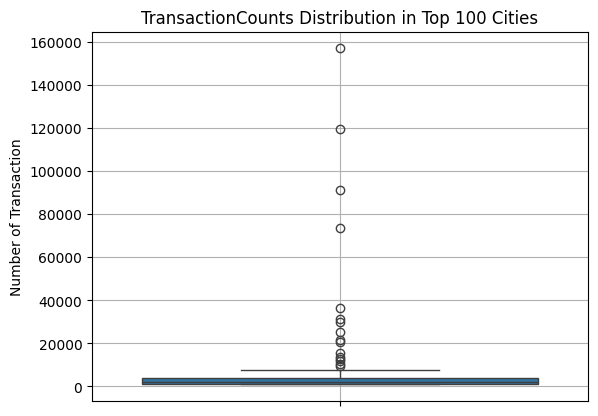

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

top_100_df = top_100.reset_index()
top_100_df.columns = ['CustLocation', 'TransactionCounts']

sns.boxplot(y=top_100_df['TransactionCounts'])
plt.title('TransactionCounts Distribution in Top 100 Cities')
plt.ylabel('Number of Transaction')
plt.grid(True)
plt.show()

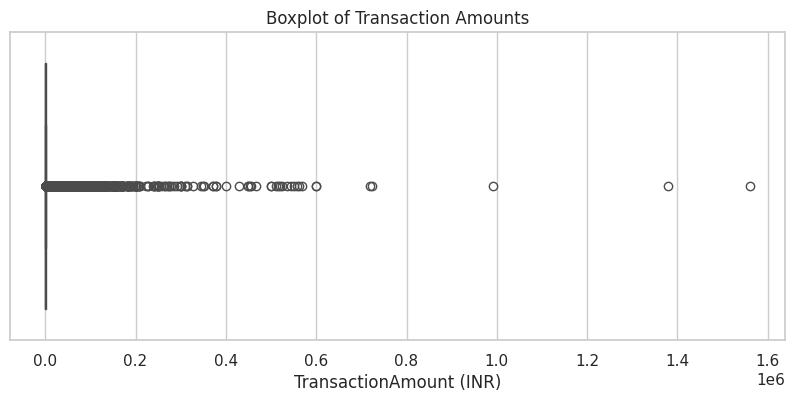

In [ ]:
# Optional: Set up a nice theme
sns.set(style="whitegrid")

# Plot 1: Transaction Amount
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_Fact1_clean["TransactionAmount (INR)"])
plt.title("Boxplot of Transaction Amounts")
plt.xlabel("TransactionAmount (INR)")
plt.show()

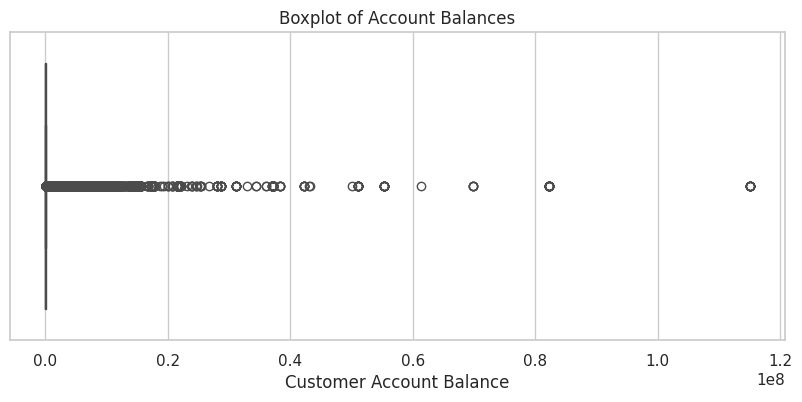

In [ ]:
# Optional: Set up a nice theme
sns.set(style="whitegrid")

# Plot 2: Account Balance
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_Fact1_clean["CustAccountBalance"])
plt.title("Boxplot of Account Balances")
plt.xlabel("Customer Account Balance")
plt.show()

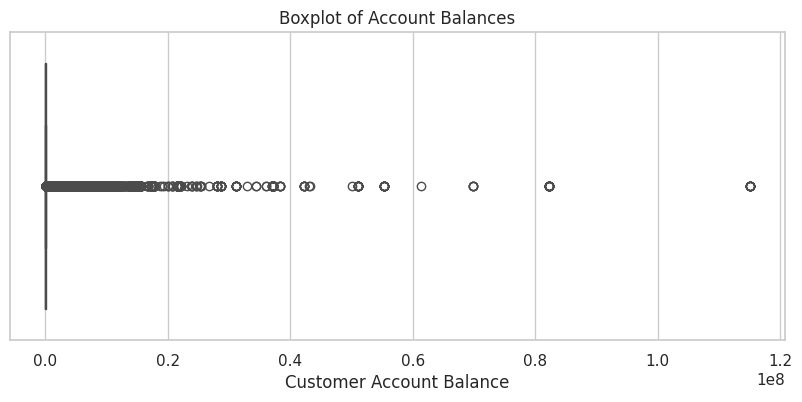

In [ ]:
# Optional: Set up a nice theme
sns.set(style="whitegrid")

# Plot 2: Account Balance
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_Fact1_clean["CustAccountBalance"])
plt.title("Boxplot of Account Balances")
plt.xlabel("Customer Account Balance")
plt.show()

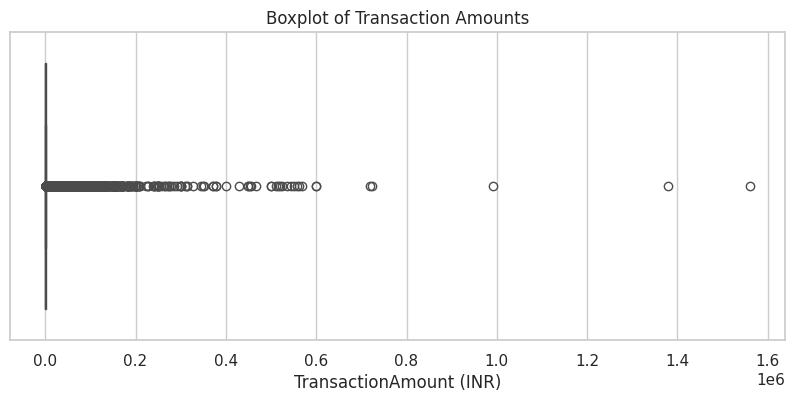

In [ ]:
# Optional: Set up a nice theme
sns.set(style="whitegrid")

# Plot 1: Transaction Amount
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_Fact1_clean["TransactionAmount (INR)"])
plt.title("Boxplot of Transaction Amounts")
plt.xlabel("TransactionAmount (INR)")
plt.show()

In [ ]:
total_transactions = top_100_df['TransactionCounts'].sum()
print(total_transactions)

866390


In [ ]:
df_Fact1_clean2 = df_Fact1_clean.copy()

In [ ]:
# Unify the same city name
df_Fact1_clean2['CustLocation'] = df_Fact1_clean2['CustLocation'].replace(
    {'BENGALURU': 'BANGALORE', 'BENGALOORU': 'BANGALORE', 'BENGALORE': 'BANGALORE'})

In [ ]:
top_100 = df_Fact1_clean2['CustLocation'].value_counts().head(100)
print(top_100)

CustLocation
DELHI          156988
MUMBAI         119647
BANGALORE       93446
GURGAON         73517
NOIDA           36171
                ...  
GWALIOR           972
HOOGHLY           966
THRISSUR          960
YAMUNANAGAR       950
MYSORE            945
Name: count, Length: 100, dtype: int64


In [ ]:
#Display the 5 top Locations
import sqlite3
conn = sqlite3.connect('transactions.db')
df_Fact1_clean2.to_sql('transactions', conn, if_exists='replace', index=False)

1040530

In [ ]:
query = """
SELECT CustLocation, COUNT(*) AS transaction_count
FROM transactions
GROUP BY CustLocation
ORDER BY transaction_count DESC
LIMIT 5
"""

top_locations = pd.read_sql_query(query, conn)
print(top_locations)

  CustLocation  transaction_count
0        DELHI             156988
1       MUMBAI             119647
2    BANGALORE              93446
3      GURGAON              73517
4        NOIDA              36171


In [ ]:
#RFM analysis
#set analysis date
analysis_date = df_Fact1_clean2['TransactionDate'].max() + pd.Timedelta(days=1)
print("Analysis date:", analysis_date)

Analysis date: 2016-12-10 00:00:00


In [ ]:
#Calculate Recency，Frequency，Monetary
rfm = df_Fact1_clean2.groupby('CustomerID').agg({
    'TransactionDate': lambda x: (analysis_date - x.max()).days,
    'TransactionID': 'count',
    'TransactionAmount (INR)': 'sum'
}).reset_index()

In [ ]:
#Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

In [ ]:
rfm.head(10)

,CustomerID,Recency,Frequency,Monetary
0,C1010011,75,2,5106.00
1,C1010012,118,1,1499.00
2,C1010014,155,2,1455.00
3,C1010018,86,1,30.00
4,C1010024,114,1,5000.00
5,C1010028,103,1,557.00
6,C1010031,246,2,1864.00
7,C1010035,105,2,750.00
8,C1010036,106,1,208.00
9,C1010037,93,1,19680.00


In [ ]:
rfm.describe()

,Recency,Frequency,Monetary
count,878545.00,878545.00,878545.00
mean,129.79,1.18,1855.89
std,80.05,0.45,7190.51
min,1.00,1.00,0.01
25%,87.00,1.00,200.00
50%,110.00,1.00,534.00
75%,154.00,1.00,1500.00
max,337.00,6.00,1560034.99


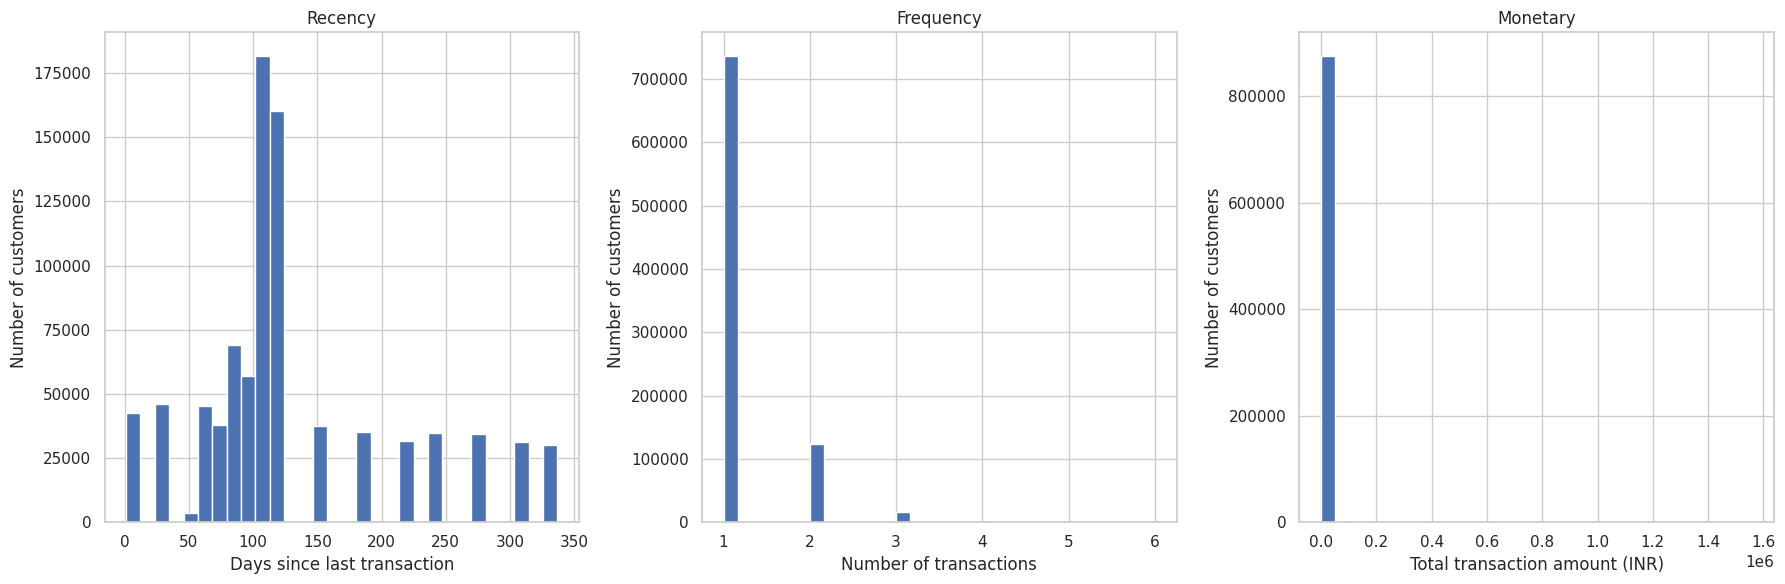

In [ ]:
#Check Distribution
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Recency
axs[0].hist(rfm['Recency'], bins=30)
axs[0].set_title('Recency')
axs[0].set_xlabel('Days since last transaction')
axs[0].set_ylabel('Number of customers')

# Frequency
axs[1].hist(rfm['Frequency'], bins=30)
axs[1].set_title('Frequency')
axs[1].set_xlabel('Number of transactions')
axs[1].set_ylabel('Number of customers')

# Monetary
axs[2].hist(rfm['Monetary'], bins=30)
axs[2].set_title('Monetary')
axs[2].set_xlabel('Total transaction amount (INR)')
axs[2].set_ylabel('Number of customers')

plt.tight_layout()
plt.show()

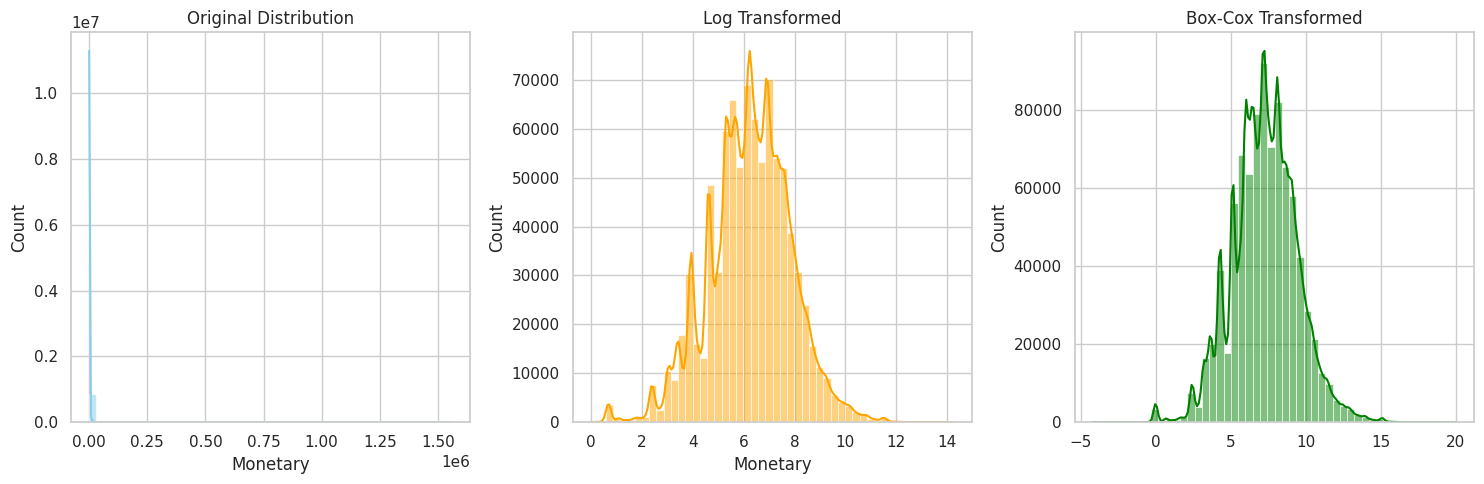

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import boxcox

# Original Monetary column
monetary = rfm['Monetary']

# Apply transformations
monetary_log = np.log1p(monetary)
monetary_boxcox, _ = boxcox(monetary[monetary > 0])  # Box-Cox needs positive values

# Plot distributions with KDE
plt.figure(figsize=(15, 5))

# Original
plt.subplot(1, 3, 1)
sns.histplot(monetary, bins = 50, kde=True, color='skyblue')
plt.title("Original Distribution")

# Log-Transformed
plt.subplot(1, 3, 2)
sns.histplot(monetary_log, bins = 50, kde=True, color='orange')
plt.title("Log Transformed")

# Box-Cox Transformed
plt.subplot(1, 3, 3)
sns.histplot(monetary_boxcox, bins = 50, kde=True, color='green')
plt.title("Box-Cox Transformed")

plt.tight_layout()
plt.show()

In [ ]:
#Here we look at skewness and kurtosis to determine which is the better fit
# Skewness should be close to 0 and kurtosis should be
from scipy.stats import skew, kurtosis

print("Skewness:")
print("Original:", skew(monetary))
print("Log:", skew(monetary_log))
print("Box-Cox:", skew(monetary_boxcox))

print("\nKurtosis:")
print("Original:", kurtosis(monetary))
print("Log:", kurtosis(monetary_log))
print("Box-Cox:", kurtosis(monetary_boxcox))

Skewness:
Original: 43.30654177738498
Log: -0.18245712732341068
Box-Cox: 0.015050219262053008

Kurtosis:
Original: 5542.788196198263
Log: 0.47210678521297966
Box-Cox: 0.6186933379579473


In [ ]:
from scipy import stats

rfm_boxcox = pd.DataFrame({
    'CustomerID': rfm['CustomerID'],
    'Recency': stats.boxcox(rfm['Recency'] + 1)[0],
    'Frequency': stats.boxcox(rfm['Frequency'])[0],
    'Monetary': stats.boxcox(rfm['Monetary'] + 1)[0]
})

In [ ]:
rfm_boxcox.head(10)

,CustomerID,Recency,Frequency,Monetary
0,C1010011,18.26,0.12,9.84
1,C1010012,23.96,0.00,8.26
2,C1010014,28.15,0.12,8.22
3,C1010018,19.83,0.00,3.63
4,C1010024,23.47,0.00,9.81
5,C1010028,22.09,0.00,7.02
6,C1010031,36.89,0.12,8.53
7,C1010035,22.35,0.12,7.39
8,C1010036,22.47,0.00,5.83
9,C1010037,20.78,0.00,11.66


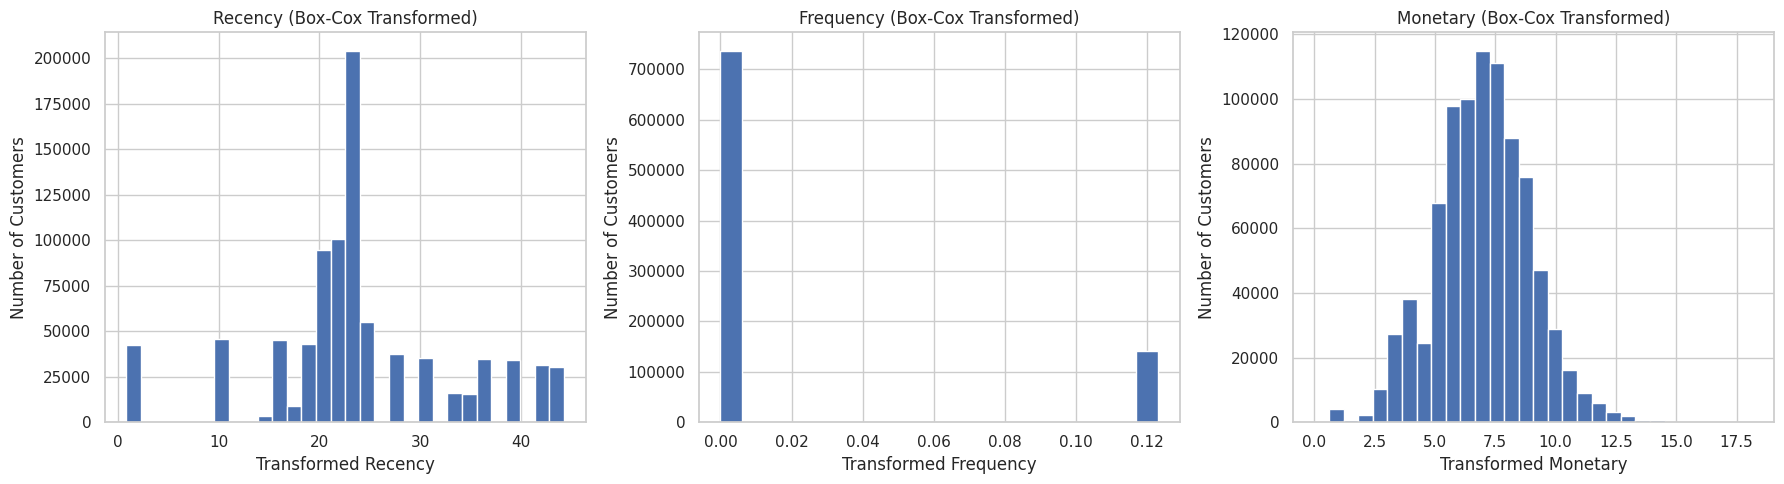

In [ ]:
#Check Distribution after remove skew

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Recency
axs[0].hist(rfm_boxcox['Recency'], bins=30)
axs[0].set_title('Recency (Box-Cox Transformed)')
axs[0].set_xlabel('Transformed Recency')
axs[0].set_ylabel('Number of Customers')

# Frequency
axs[1].hist(rfm_boxcox['Frequency'], bins=20)
axs[1].set_title('Frequency (Box-Cox Transformed)')
axs[1].set_xlabel('Transformed Frequency')
axs[1].set_ylabel('Number of Customers')

# Monetary
axs[2].hist(rfm_boxcox['Monetary'], bins=30)
axs[2].set_title('Monetary (Box-Cox Transformed)')
axs[2].set_xlabel('Transformed Monetary')
axs[2].set_ylabel('Number of Customers')

plt.tight_layout()
plt.show()


In [ ]:
# K-means
rfm_boxcox1=rfm_boxcox.copy()

In [ ]:
#Data Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_boxcox1[['Recency', 'Frequency', 'Monetary']])

In [ ]:
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])
rfm_scaled_df.head()

,Recency,Frequency,Monetary
0,-0.60,2.28,1.46
1,-0.00,-0.44,0.65
2,0.44,2.28,0.63
3,-0.44,-0.44,-1.71
4,-0.05,-0.44,1.45


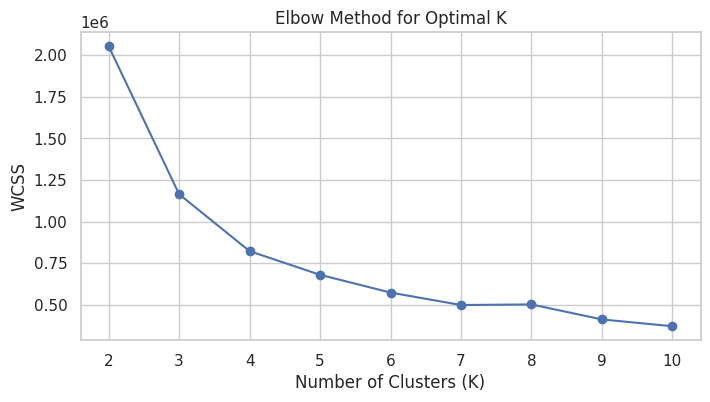

In [ ]:
# Elbow
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# Elbow chart
plt.figure(figsize=(8, 4))
plt.plot(K_range, wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

In [ ]:
# Please note:
# Since the calculation steps of Sihouette score are cumbersome and our data size is huge
# we need to limit the sample data size.

In [ ]:
# Silhouette verification
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Limit data sample size
sample_size = 50000
np.random.seed(42)

# Random sampling from rfm_scaled
indices = np.random.choice(rfm_scaled.shape[0], sample_size, replace=False)
rfm_sampled = rfm_scaled[indices]

# Run Silhouette verification
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(rfm_sampled)
    score = silhouette_score(rfm_sampled, labels)
    print(f'K={k} Silhouette Score: {score:.4f}')

K=2 Silhouette Score: 0.5039
K=3 Silhouette Score: 0.4180
K=4 Silhouette Score: 0.4127
K=5 Silhouette Score: 0.3782
K=6 Silhouette Score: 0.3764
K=7 Silhouette Score: 0.4164
K=8 Silhouette Score: 0.4017
K=9 Silhouette Score: 0.3824
K=10 Silhouette Score: 0.3788


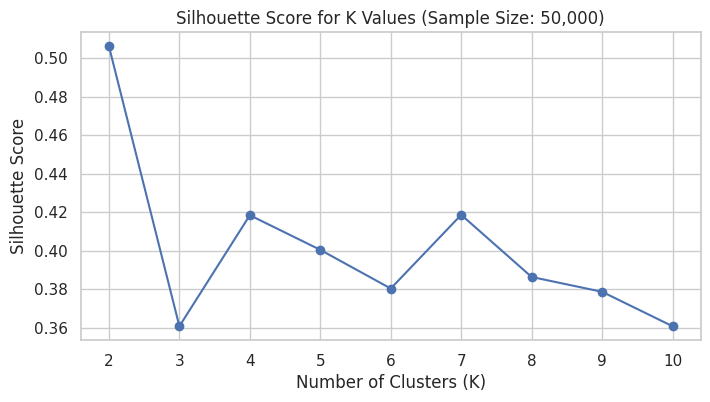

In [ ]:
# Silhouette_scores chart
k_values = list(range(2, 11))
silhouette_scores = [0.5062, 0.3607, 0.4184, 0.4004, 0.3803, 0.4186, 0.3863, 0.3786, 0.3607]

plt.figure(figsize=(8, 4))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score for K Values (Sample Size: 50,000)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [128]:
#Applying K-means cluster
from sklearn.cluster import KMeans

k = 4

kmeans = KMeans(n_clusters=k, random_state=42)
rfm_boxcox1['Cluster'] = kmeans.fit_predict(rfm_scaled)

In [129]:
# Calculate each group average of RFM
cluster_summary = rfm_boxcox1.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(2)

print(cluster_summary)

         Recency  Frequency  Monetary
Cluster                              
0          38.41       0.00      6.79
1          20.71       0.00      8.27
2          20.71       0.00      5.12
3          19.44       0.12      8.24


In [130]:
rfm_boxcox1['Cluster'].value_counts()

,count
Cluster,
1,287851
2,276397
0,172611
3,141686


In [131]:
df_clustered = df_Fact1_clean2.copy()
df_clustered['Cluster'] = rfm_boxcox1['Cluster']

In [132]:
# Cluster 0
cluster_0_locations = df_clustered[df_clustered['Cluster'] == 0]['CustLocation'].value_counts()

# Cluster 1
cluster_1_locations = df_clustered[df_clustered['Cluster'] == 1]['CustLocation'].value_counts()

# Cluster 2
cluster_2_locations = df_clustered[df_clustered['Cluster'] == 2]['CustLocation'].value_counts()

# Cluster 3
cluster_3_locations = df_clustered[df_clustered['Cluster'] == 3]['CustLocation'].value_counts()

In [133]:
rfm_boxcox1.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean', 'count']}).round(2)

Recency Frequency Monetary        
           mean      mean     mean   count
Cluster                                   
0         38.41      0.00     6.79  172611
1         20.71      0.00     8.27  287851
2         20.71      0.00     5.12  276397
3         19.44      0.12     8.24  141686

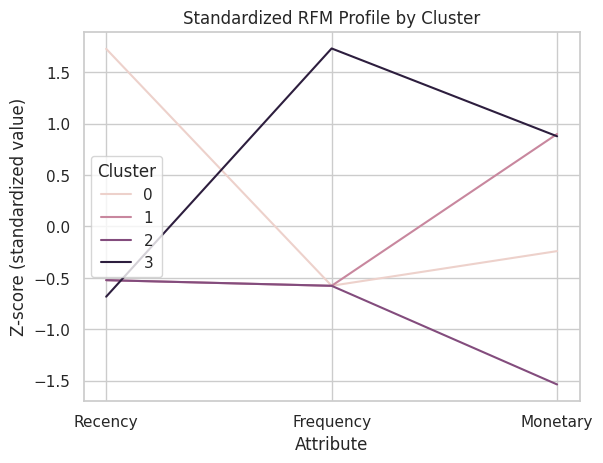

In [140]:
from sklearn.preprocessing import StandardScaler

# Step 1: Create cluster-wise average RFM DataFrame
cluster_avg = df_normalized.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()

# Step 2: Standardize the averages
scaler = StandardScaler()
cluster_avg_scaled = scaler.fit_transform(cluster_avg)
cluster_scaled_df = pd.DataFrame(cluster_avg_scaled, columns=cluster_avg.columns)
cluster_scaled_df['Cluster'] = cluster_avg.index

# Step 3: Melt for plotting
df_melt_scaled = pd.melt(
    cluster_scaled_df,
    id_vars='Cluster',
    var_name='Attribute',
    value_name='Value'
)

# Step 4: Plot
sns.lineplot(x='Attribute', y='Value', hue='Cluster', data=df_melt_scaled)
plt.title("Standardized RFM Profile by Cluster")
plt.ylabel("Z-score (standardized value)")
plt.show()

In [138]:
print(df_normalized['Cluster'].value_counts())

Cluster
1    287851
2    276397
0    172611
3    141686
Name: count, dtype: int64


In [118]:
df_normalized['Cluster'].value_counts()

,count
Cluster,
1,287851
2,276397
0,172611
3,141686


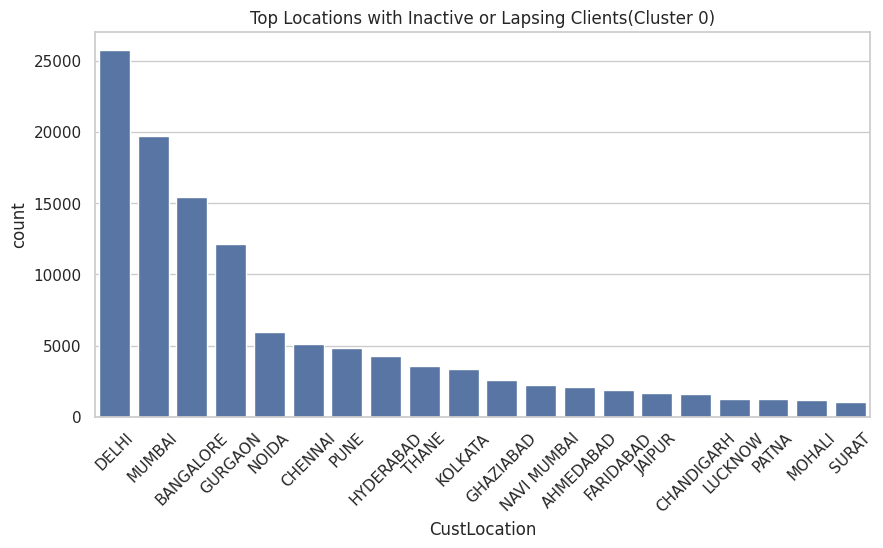

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_clustered[df_clustered['Cluster'] == 0], x='CustLocation', order=df_clustered['CustLocation'].value_counts().head(20).index)
plt.title('Top Locations with Inactive or Lapsing Clients(Cluster 0)')
plt.xticks(rotation=45)
plt.show()

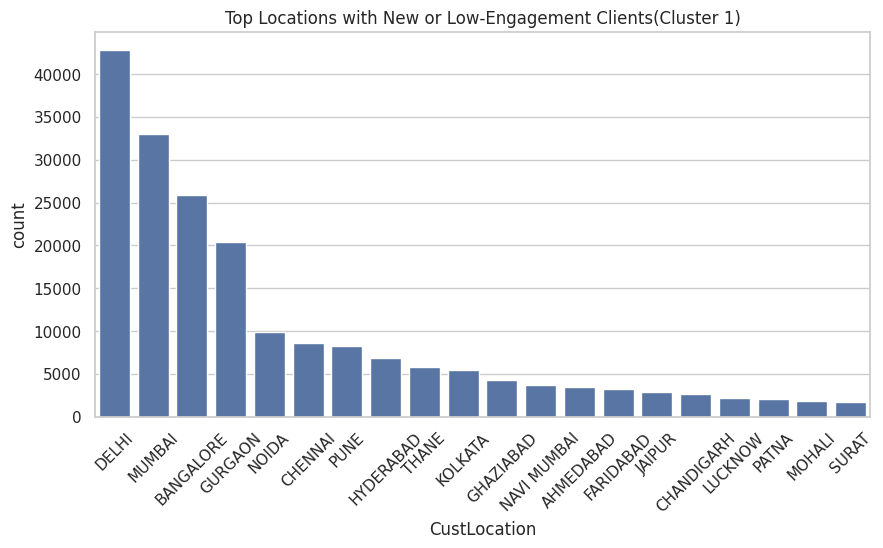

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_clustered[df_clustered['Cluster'] == 1], x='CustLocation', order=df_clustered['CustLocation'].value_counts().head(20).index)
plt.title('Top Locations with New or Low-Engagement Clients(Cluster 1)')
plt.xticks(rotation=45)
plt.show()

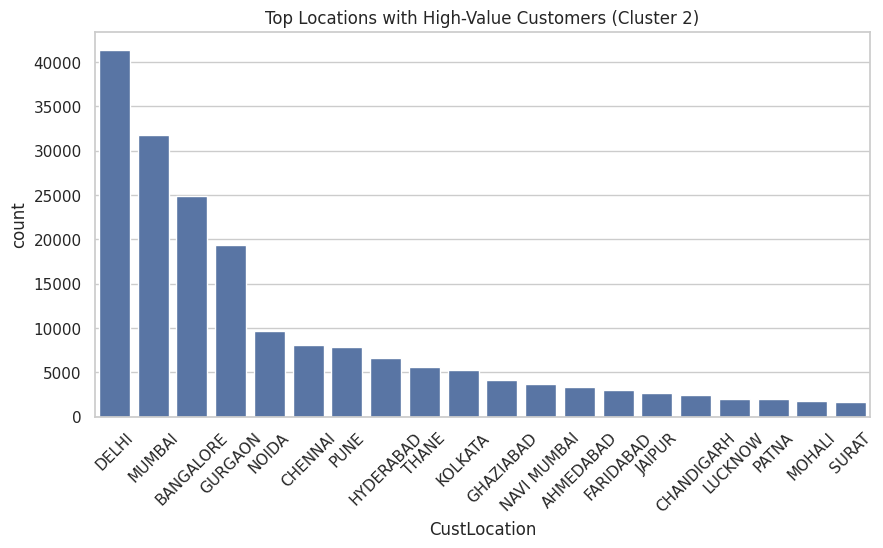

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_clustered[df_clustered['Cluster'] == 2], x='CustLocation', order=df_clustered['CustLocation'].value_counts().head(20).index)
plt.title('Top Locations with High-Value Customers (Cluster 2)')
plt.xticks(rotation=45)
plt.show()

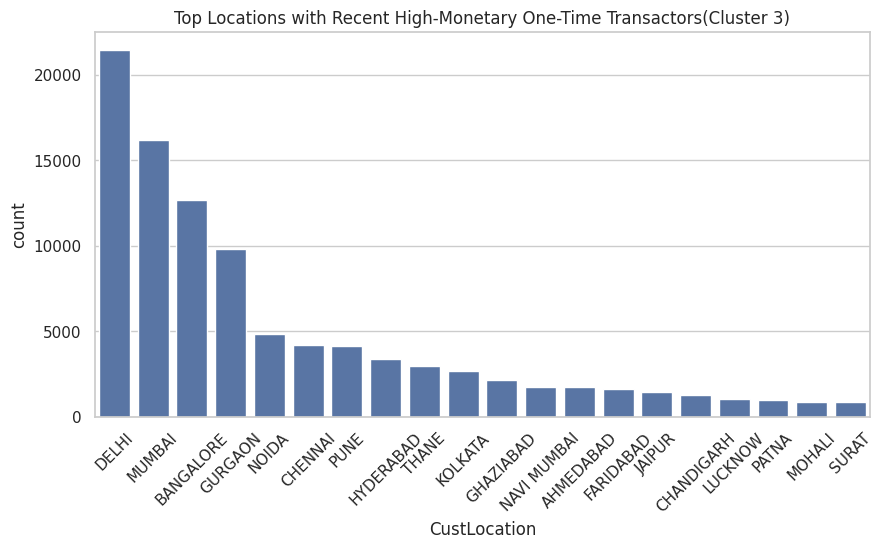

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_clustered[df_clustered['Cluster'] == 3], x='CustLocation', order=df_clustered['CustLocation'].value_counts().head(20).index)
plt.title('Top Locations with Recent High-Monetary One-Time Transactors(Cluster 3)')
plt.xticks(rotation=45)
plt.show()